Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 312
Code Title: | Predictive Analytics using Machine Learning
1st Semester | AY 2024-2025
<hr>|<hr>
**ACTIVITY** | **Final Project**
**Name** | Malaki Karl Josef
**Section** | CPE31S31
**Date Performed**: | 12/2/24
**Date Submitted**: | 12/16/24
**Instructor**: | Dr. Alonica Villanueva
<hr>

# **PROBLEM**


---

The cement manufacturing process is often hindered by challenges especially when creating a balanced mixture of cement, slag, ash, water, superplastic, coarse aggregate, and fine aggregate. Due to this inconsistency, the cement produced from the mixture results in variable quality including fluctuations in strength, durability, and setting time which can lead to increased production costs, and materials being wasted.


Hence, the main objective for this project is to identify which ingredient ratios would produce a stronger yield using different clustering algorithms specifically DBSCAN, K-Means, and Gaussian Mixture Models. With this project, it can help discover relationships and patterns between these ingredients to help the cement manufacturers produce a better quality yield.


# **METHODOLOGY**

To perform this project, the environment to be used is the google colaboratory which integrates jupyter notebook that can help interpret Python code. Furthermore, The data will undergo the preprocessing stage, where descriptive statistics and visualization will occur. Scaling and outlier detection will also be a big part of this project and will be the last part before transitioning to training and result discussions. As for the algorithms, there will be a performance comparision between the three algorithm specifically, K-means, DBSCAN, and gmm. After finding the best algorithm to be used, it is then used for analysis and finding out which ingredient ratios or clusters will produce a stronger cement.

# **RESULTS & DISCUSSION**

In [ ]:
#Importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Importing the dataset through github link
github_link = "https://raw.githubusercontent.com/CodeBlock980/MachineLearningPersonal/refs/heads/main/Predictive%20Modeling/Machine%20Learning%20-%20%20Final%20Project/concrete.csv"

In [ ]:
#Dataset
concrete = pd.read_csv(github_link)
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [ ]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
#We check for null values
concrete.isna().sum()

,0
cement,0
slag,0
ash,0
water,0
superplastic,0
coarseagg,0
fineagg,0
age,0
strength,0


Next we check for the distribution of the data.

array([[<Axes: title={'center': 'cement'}>,
        <Axes: title={'center': 'slag'}>,
        <Axes: title={'center': 'ash'}>],
       [<Axes: title={'center': 'water'}>,
        <Axes: title={'center': 'superplastic'}>,
        <Axes: title={'center': 'coarseagg'}>],
       [<Axes: title={'center': 'fineagg'}>,
        <Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

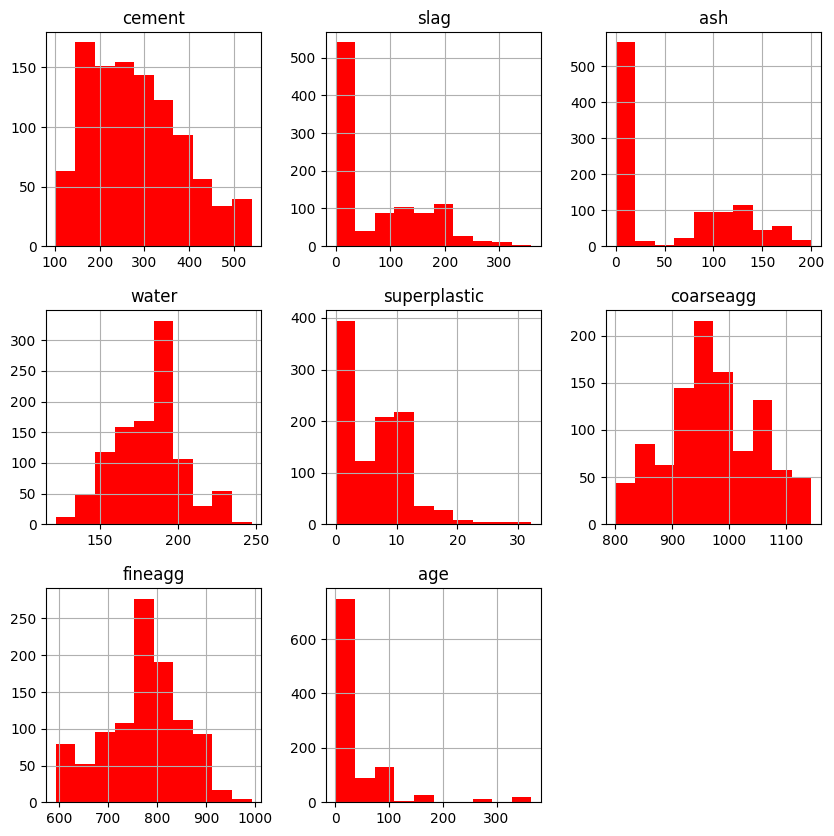

In [ ]:
concrete.iloc[:,:-1].hist(figsize=(10,10), color='red')

***INTERPRETATION***

After observing the distribution, we could see that some columns here are skewed. As seen from columns: age, slag, ash, and superplastic. We could see that majority of these columns contains zero values in them. We do not drop the these values because these are meaningful. Lastly, we could also see that from the distribution of the age column, values can range from 0 - 300 and majority of these values are seen on upper half of the percentile.

In [ ]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
#We split the data into features and targets
X = concrete.iloc[:,:-1]
y = concrete.iloc[:,-1].astype(int)

In [ ]:
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


Now lets take the X features and scale it using the min max scaler

In [ ]:
#import the scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#Lets turn it into a dataframe
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,0.089726,0.589872,0.000000,0.652556,0.000000,0.496512,0.387607,0.074176
1,0.152740,0.117418,0.621189,0.291534,0.335404,0.813372,0.507275,0.035714
2,0.337900,0.000000,0.478261,0.523962,0.170807,0.453198,0.670346,0.074176
3,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,0.074176
4,0.120548,0.510295,0.000000,0.571086,0.282609,0.716279,0.257652,0.074176


array([[<Axes: title={'center': 'cement'}>,
        <Axes: title={'center': 'slag'}>,
        <Axes: title={'center': 'ash'}>],
       [<Axes: title={'center': 'water'}>,
        <Axes: title={'center': 'superplastic'}>,
        <Axes: title={'center': 'coarseagg'}>],
       [<Axes: title={'center': 'fineagg'}>,
        <Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

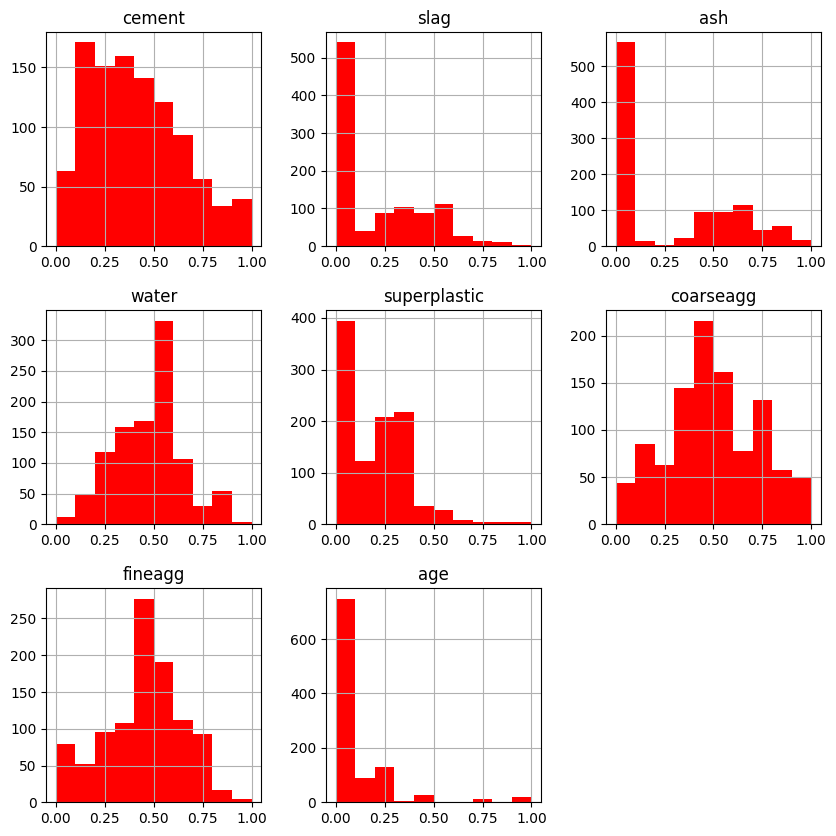

In [ ]:
#To ensure that we hava consistent scaling, we could check its distribution again using a histplot
X_scaled.hist(figsize=(10,10), color='red')


***Interpretation***

After scaling the values using minmaxscaler(), above shows the new histplot of the dataset. As seen from the graph, values are now scaled between 0 and 1.

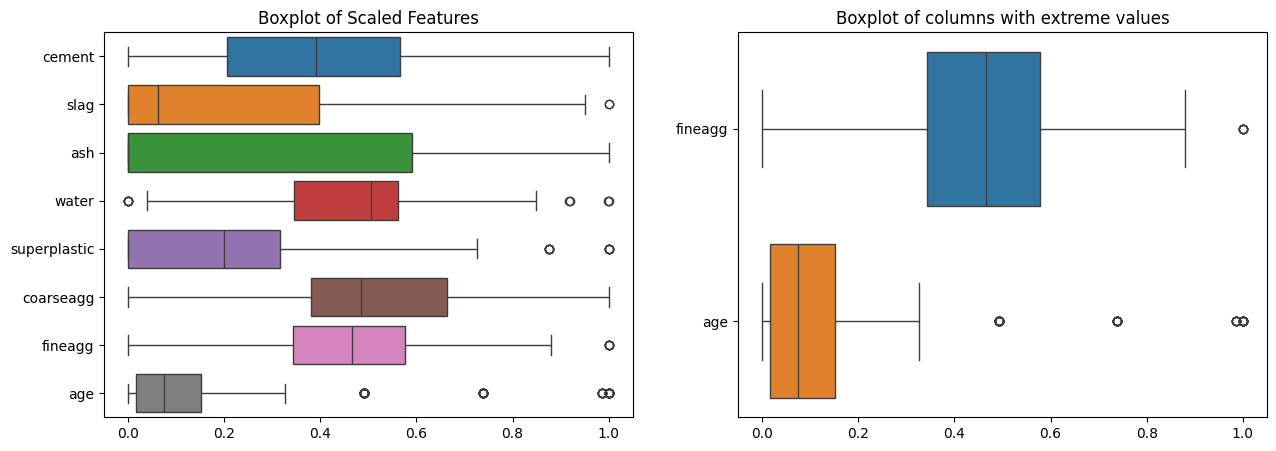

In [ ]:
#Checking for outliers

#Scaled values
fig, axes = plt.subplots(1,2,figsize= (15, 5))
sns.boxplot(data=X_scaled, orient='h', ax=axes[0])
box_scaled_orig = axes[0].set_title('Boxplot of Scaled Features')

#Extremes
sns.boxplot(data=X_scaled[['fineagg', 'age']], orient='h', ax=axes[1])
axes[1].set_title('Boxplot of columns with extreme values')
plt.show()

***INTERPRETATION***

Based on the graph, it is evident that columns after the cement column contains outliers (right graph). Moreover, columns such as the fineagg and age shows extreme values which could be significant and therefore will remain in the dataset.

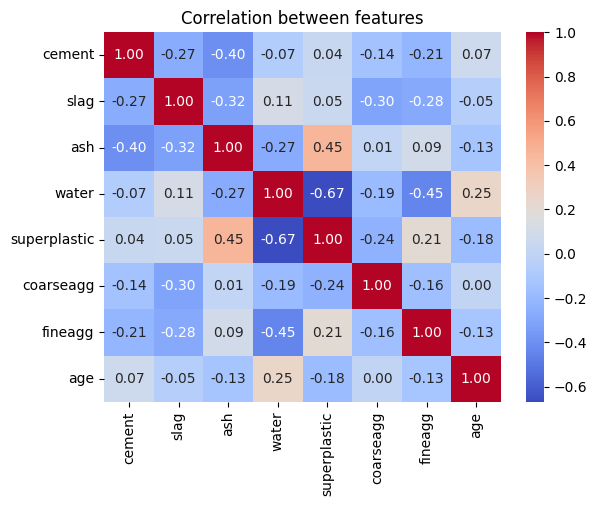

In [ ]:
#Check for correlations
sns.heatmap(x_scaled.corr(), annot=True, fmt='.2f',cmap = 'coolwarm')
plt.title('Correlation between features')
plt.show()


Text(0.5, 1.0, 'Correlations of Features vs Strength')

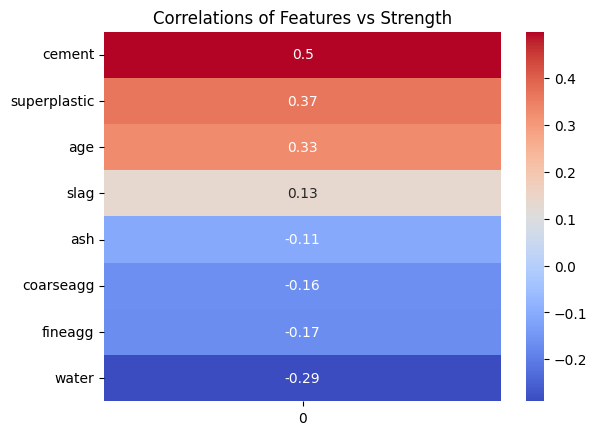

In [ ]:
#Check for correlations of each feature variables with targets.
fields = X.columns.to_list()
corr = X[fields].corrwith(y)

sns.heatmap(corr.sort_values(ascending=False).to_frame(), annot=True, cmap='coolwarm')
plt.title("Correlations of Features vs Strength")

Next we apply PCA to reduce the dimensions in our model. We first need to find the smallest number of n_components that would explain 95% of the variance in the dataset.

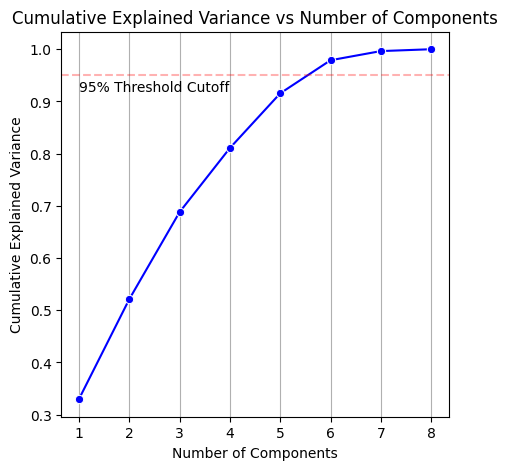

In [ ]:
#Import PCA
from sklearn.decomposition import PCA

#Instantiate PCA object
pca = PCA()
pca_all = pca.fit_transform(X_scaled)

#Cumulative variance
cumul_var = np.cumsum(pca.explained_variance_ratio_)

#And then we visualize
plt.figure(figsize=(5,5))
sns.lineplot(x=range(1, len(cumul_var)+1), y=cumul_var, marker='o', color='blue')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.grid(axis='x')

#Create a horizontal line to explain the 95% threshold
plt.axhline(y=0.95, color='red', linestyle = '--', alpha=0.3)
plt.text(1, 0.92, '95% Threshold Cutoff')
plt.show()

***INTERPRETATION***

Based from the line plot above, the smallest number of components that would explain 95% of the variance in our dataset would be n_components = 6 (found above the threshold cutoff).

In [ ]:
#Applying PCA transformations
pca = PCA(n_components=6)

x_pca = pca.fit_transform(X_scaled)

#Lets turn it into a dataframe
x_pca = pd.DataFrame(x_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
x_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.318883,0.468613,0.226336,0.135481,0.031823,-0.071402
1,0.492975,-0.020769,0.183270,0.201752,-0.194997,0.049538
2,0.277001,-0.085899,-0.007471,0.048155,0.226235,-0.072092
3,-0.410147,0.185393,0.183818,-0.216077,0.102444,-0.193517
4,-0.240855,0.325169,0.230594,0.160767,-0.246012,0.033871


### **K-means Algorithm**

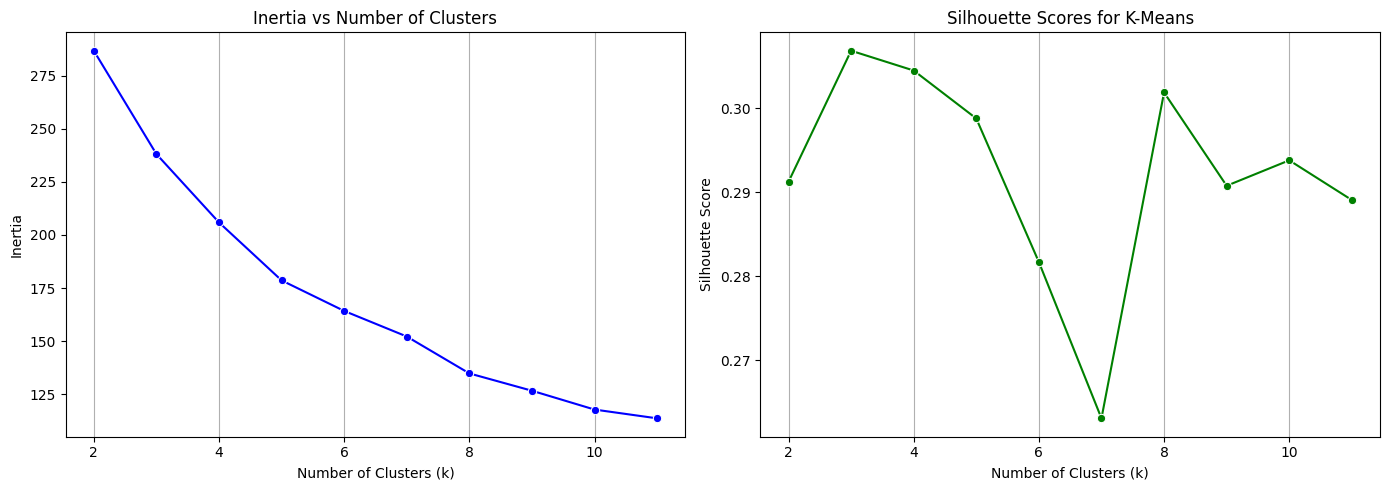

In [ ]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate KMeans
kmeans = KMeans()

# Create inertia and silhouette lists for scoring
inertia = []
silhouette = []

# Use for loop to identify the elbow point and silhouette score in KMeans
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_pca) #Fit the model
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(x_pca, kmeans.labels_))

# make them side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# elbow plot
sns.lineplot(ax=axes[0], x=range(2, 12), y=inertia, marker='o', color='blue')
axes[0].set_title('Inertia vs Number of Clusters')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].grid(axis='x')

# silhouette plot
sns.lineplot(ax=axes[1], x=range(2, 12), y=silhouette, marker='o', color='green')
axes[1].set_title('Silhouette Scores for K-Means')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(axis='x')
plt.tight_layout()
plt.show()


***INTERPRETATION***

The graphs shown above represents the lineplot of the optimal number of clusters based on the X_pca values. On the left, it shows the optimal number of clusters using the elbow method but we could hardly determine the optimal value of k because there is no noticeable drop in the graph. However, we could see that it had shown a slight decrease when k=3. This is also evident on the right side of the graph where it shows the Silhouette scores for K-means. On the graph, the number of clusters (k) peaks at k=3.

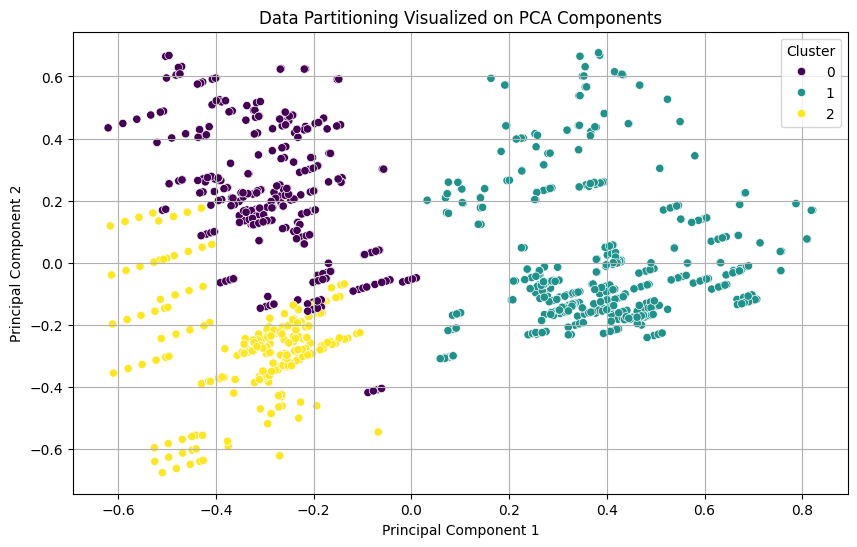

In [ ]:
#Now we fit k=6 (optimal value of clusters)

#Instantiate
new_kmeans = KMeans(n_clusters=3, random_state = 42)
new_kmeans.fit_transform(x_pca)
clusters = new_kmeans.predict(x_pca)

#We convert it into a dataframe
pca_df = pd.DataFrame(x_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df['Cluster'] = clusters

#Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=pca_df['Cluster'], palette='viridis')
plt.title('Data Partitioning Visualized on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



***INTERPRETATION***

The graph above shows the final partitioning of the different clusters using the Kmeans algorithm. The clusters from 0-5 shows reasonable partitions, however there are a lot of overlapping boundaries between clusters. Furthermore, clusters such as 0 and 2 are very close to each other which suggests that there is a poor separation between these clusters causing them to overlap. Lastly, datapoints between clusters are also far away from each other, which indicates poor clustering characteristics.

### **DBSCAN**

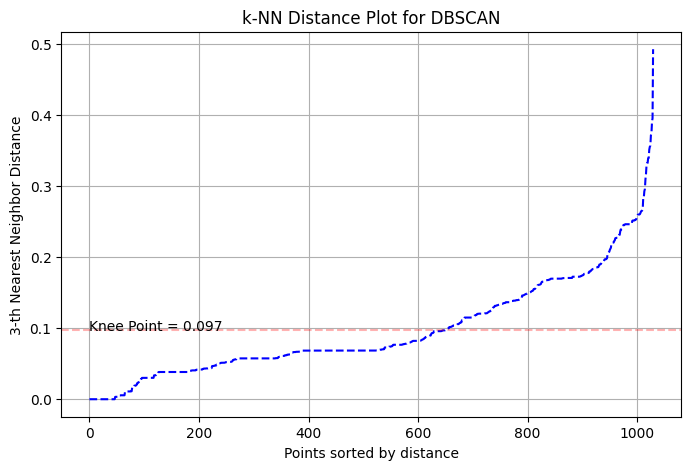

Epsilon is 0.0973445813822175


In [ ]:
#Imports
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Number of features
min_samples = 3

# Compute for epsilon
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(x_pca)
distances, indices = neighbors_fit.kneighbors(x_pca)

# We sort the distances
distances = np.sort(distances[:, min_samples - 1])

# Plot the k-distance graph
plt.figure(figsize=(8, 5))
plt.plot(distances, linestyle='--', color='b')
plt.title('k-NN Distance Plot for DBSCAN')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.axhline(y=np.mean(distances), color='r', linestyle ='--', alpha=0.3)
plt.text(y=np.mean(distances), x=0, s='Knee Point = 0.097')
plt.grid()
plt.show()

#Find the mean of distances
epsilon = np.mean(distances)
print(f'Epsilon is {epsilon}')

Number of clusters detected: 104
Number of noise points detected: 326


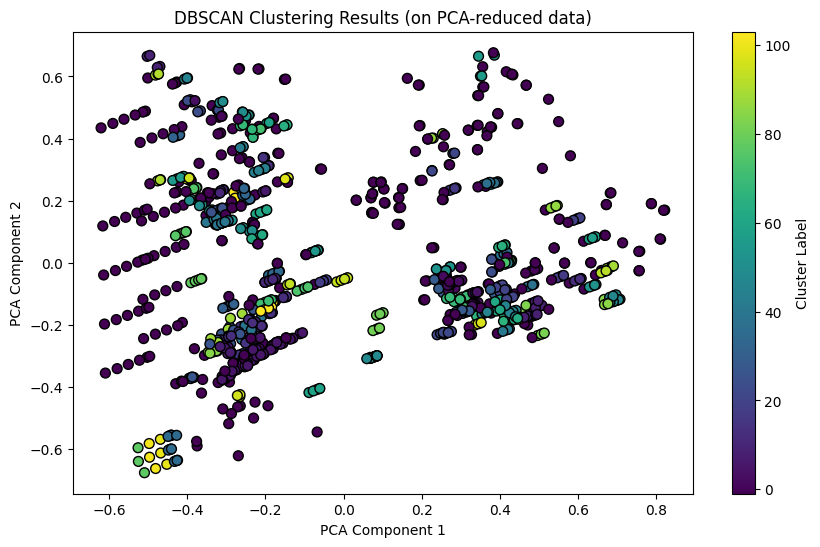

In [ ]:
# Import DBSCAN
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Run DBSCAN with chosen eps and min_samples
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(x_pca)
labels = db.labels_  # Cluster labels assigned to each point
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise
print(f"Number of clusters detected: {n_clusters}")
print(f"Number of noise points detected: {list(labels).count(-1)}")

# Visualize clustering results
plt.figure(figsize=(10, 6))
plt.scatter(x_pca['PC1'], x_pca['PC2'], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.title("DBSCAN Clustering Results (on PCA-reduced data)")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label="Cluster Label")
plt.show()


***INTERPRETATION***

The graph above shows the DBSCAN results. Based from the graph, the DBSCAN algorithm was able to partition the datapoints into 104 different clusters. Furthermore, there are 326 datapoints identified by the algorithm that does not belong to any of the clusters which could imply that they are considered to be a noise.

### **Gaussian Mixture Model**

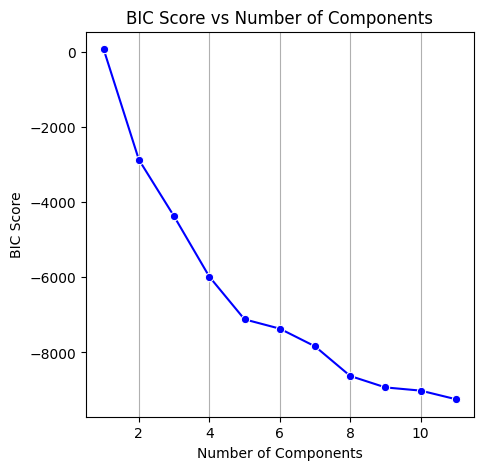

In [ ]:
from sklearn.mixture import GaussianMixture

#find the n_components again
bic_scores = list()

for n_components in range(1,12):
  gmm = GaussianMixture(n_components=n_components, random_state=42)
  gmm.fit(x_pca)
  bic_scores.append(gmm.bic(x_pca))

#plot the optimal n_components
plt.figure(figsize=(5,5))
sns.lineplot(x=range(1,12), y=bic_scores, marker='o', color='blue')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.title('BIC Score vs Number of Components')
plt.grid(axis='x')
plt.show()

***INTERPRETATION***

The graph above shows the best number of components to use as a parameter for gmm which is n_component = 2. This indicates that the number of partitions that should be shown after fitting and predicting the values of x_pca should 2 label values.

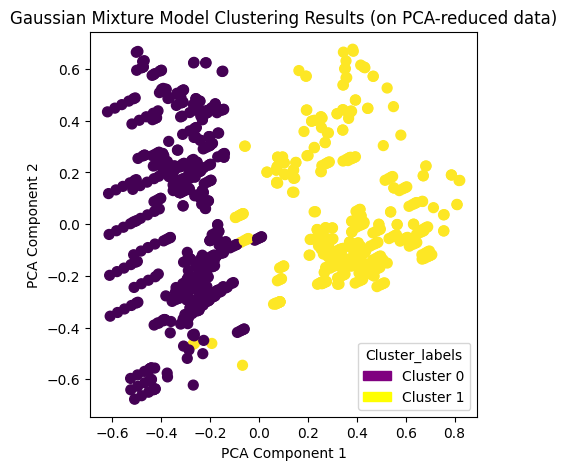

In [ ]:
#We choose this as our n_components
import matplotlib.patches as patch


gmm = GaussianMixture(n_components = 2, random_state=42)
gmm.fit(x_pca)

#predict cluster labels
label_2 = gmm.predict(x_pca)

#Visualize
plt.figure(figsize = (5,5))
plt.scatter(x_pca['PC1'], x_pca['PC2'], c=label_2, s=50)
plt.title("Gaussian Mixture Model Clustering Results (on PCA-reduced data)")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

handles = [
    patch.Patch(color = 'purple', label = 'Cluster 0'),
    patch.Patch(color = 'yellow', label = 'Cluster 1')
]

plt.legend(handles = handles, title = 'Cluster_labels')

plt.show()

***INTERPRETATION***

The graph above shows the partitioning of the datapoints using gmm. As seen from the graph, the model produced two distinct groups or clusters. To interpret, there are two colors that represent the clusters, the purple cluster which represents datapoints with labels 0, and the yellow cluster which represents the datapoints that belongs to labels 1. Furthermore, we could also see that in cluster 1, there are datapoints that are far away from their clusters which could indicate outliers in the dataset.

<ipython-input-197-d9ab385b485a>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='strength', data=cluster_summary, palette='rocket', ax=axes[1])


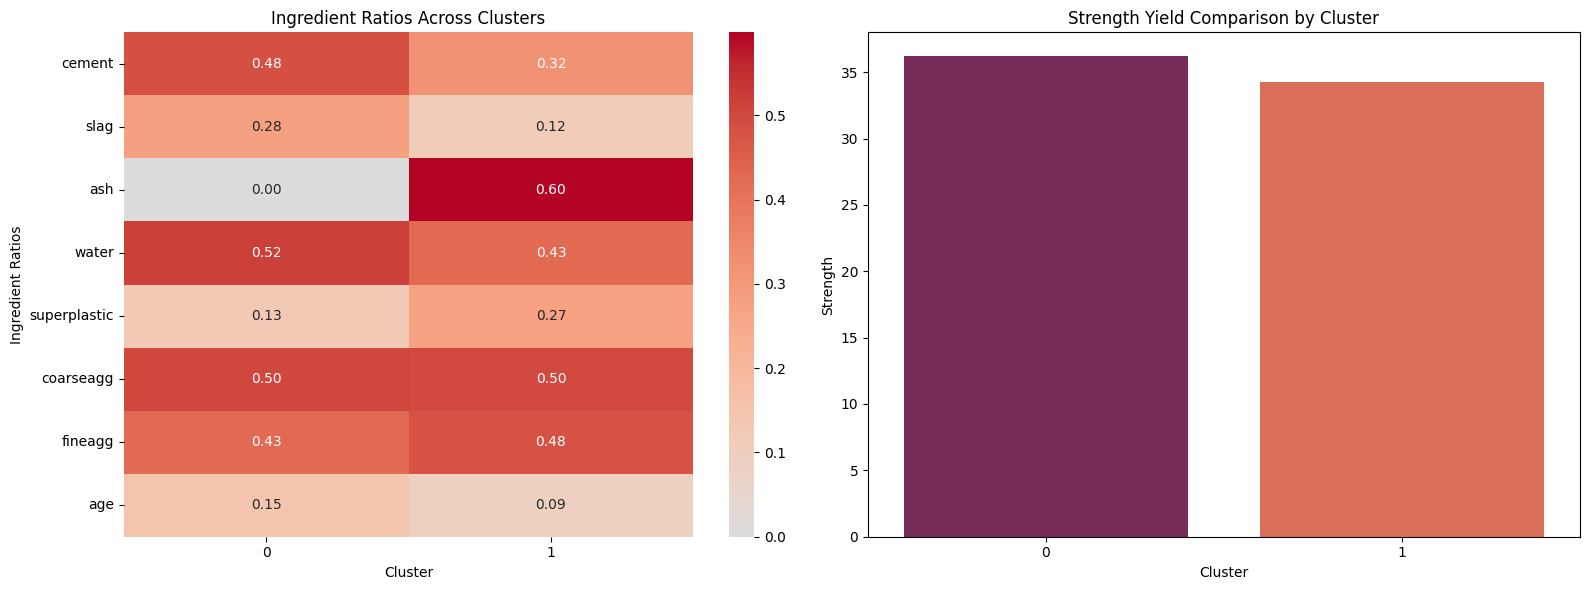

In [ ]:
import matplotlib.patches as patch

# Add cluster assignments to the dataset
X_scaled['Cluster'] = label_2

# Compute mean values of ingredient ratios across clusters
cluster_means = X_scaled.groupby('Cluster').mean()

melted_means = cluster_means.reset_index().melt(id_vars='Cluster', var_name='Ingredient', value_name='Mean_Value')

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot - Average ingredient ratios across clusters (heatmap-like visualization)
sns.heatmap(
    cluster_means.T, cmap='coolwarm', annot=True, center=0, fmt=".2f", ax=axes[0]
)
#
axes[0].set_title("Ingredient Ratios Across Clusters")
axes[0].set_xlabel("Cluster")
axes[0].set_ylabel("Ingredient Ratios")

#AVG strength for comparison purposes
sns.barplot(x='Cluster', y='strength', data=cluster_summary, palette='rocket', ax=axes[1])
axes[1].set_title("Strength Yield Comparison by Cluster")
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Strength")

plt.tight_layout()
plt.show()


***INTERPRETATION***

The heatmap on the left shows the ratio of ingredients per cluster. To interpret, if we look at the cement column, it has a higher number of components in cluster 0 than 1. This indicates that there are more cement in cluster 0  labels than cluster 1. As for the right bar plot, we could see the aggregated version based on the strength column. To interpret, with the aggregated ingredient ratios of cluster's 1 and 0, the stronger cluster between the two is cluster 0.

# **CONCLUSION**

The three algorithms were performed to see which of them would produce the best partitions. To briefly discuss, after implementing the K-Means algorithm, the result shows reasonable partitions of clusters, however there were a lot of datapoints from different clusters that  overlaps with clusters aside from them. Furthermore, the distances of datapoints between the centroids of each clusters were also far away which could be due to the extremities that was detected by the boxplots earlier. These extremities were also detected by the DBSCAN model. The noise (extremities) detected by the DBSCAN model could suggest that the data has too many outliers or has a very sparse region. This can be fine-tuned by adjusting the ```eps``` and ```min_samples``` values. As for gmm which was the last model to be trained, produced distinct partitions as well. However, there are several datapoints found in the visualization that were overlapping with each other.

Lastly, as for the ingredient ratios and which of these ingredient ratios produces a stronger cement. It was evident from the visualization that cluster 0 has a better over all strength, the heatmap on left shows the ratio of the components, by cross-referencing that to the right bar plot, the ratios of ingredients of cluster 0 will produce a stronger cement.

